# Code Description

## Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import ta 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, GRU, Dense,LSTM
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Loading Dataset

In [3]:

# Load dataset (2019-2024)

df=pd.read_csv("/Users/rohan/Documents/GitHub/RT-Sem-2/Dataset/1H(2019-2024).csv")

In [4]:
df.drop(["Volume"],axis=1,inplace=True)

## Renaming Columns


In [5]:
df.rename(columns={'Gmt time' : 'timestamp', 'Open' : 'open', 
                   'High' : 'high', 'Low' : 'low', 'Close' : 'close'}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'],format="mixed",infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
df = df.astype(float)

/var/folders/l_/_lklt0y16gxfy4_c8rk_0chw0000gn/T/ipykernel_2615/3129963496.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp'] = pd.to_datetime(df['timestamp'],format="mixed",infer_datetime_format=True)


In [6]:
df.head()

,open,high,low,close
timestamp,,,,
2019-01-01 00:00:00,1.14627,1.14627,1.14627,1.14627
2019-01-01 01:00:00,1.14627,1.14627,1.14627,1.14627
2019-01-01 02:00:00,1.14627,1.14627,1.14627,1.14627
2019-01-01 03:00:00,1.14627,1.14627,1.14627,1.14627
2019-01-01 04:00:00,1.14627,1.14627,1.14627,1.14627


## Adding Columns

In [23]:
df['hour'] = df.index.hour
df['day']  = df.index.weekday # Day of the week
df['week'] = df.index.to_series().dt.isocalendar().week
df['week'] = df.index.isocalendar().week
df['momentum']  = (df['open'] - df['close'])
df['avg_price'] = (df['low'] + df['high'])/2
df['range']     = df['high'] - df['low']
df['ohlc_price'] = (df['low'] + df['high'] + df['open'] + df['close'])/4
df['macd'] = ta.trend.MACD(close = df['close']).macd()
df['rsi'] = ta.momentum.RSIIndicator(close = df['close'], window = 14).rsi()
df['sma'] = ta.trend.SMAIndicator(close = df['close'], window = 14).sma_indicator()

print(df.head())
print(df.shape)


                        open     high      low    close  hour  day  week  \
timestamp                                                                  
2019-02-01 01:00:00  1.14561  1.14563  1.14457  1.14521     1    4     5   
2019-02-01 02:00:00  1.14521  1.14533  1.14426  1.14456     2    4     5   
2019-02-01 03:00:00  1.14456  1.14487  1.14446  1.14457     3    4     5   
2019-02-01 04:00:00  1.14456  1.14468  1.14426  1.14449     4    4     5   
2019-02-01 05:00:00  1.14450  1.14788  1.14449  1.14780     5    4     5   

                     momentum  avg_price    range  ohlc_price  macd  rsi  sma  
timestamp                                                                      
2019-02-01 01:00:00   0.00040   1.145100  0.00106    1.145255   NaN  NaN  NaN  
2019-02-01 02:00:00   0.00065   1.144795  0.00107    1.144840   NaN  NaN  NaN  
2019-02-01 03:00:00  -0.00001   1.144665  0.00041    1.144615   NaN  NaN  NaN  
2019-02-01 04:00:00   0.00007   1.144470  0.00042    1.144498   NaN

In [24]:
df.isnull().sum()

open           0
high           0
low            0
close          0
hour           0
day            0
week           0
momentum       0
avg_price      0
range          0
ohlc_price     0
macd          25
rsi           13
sma           13
dtype: int64

In [25]:
# drop null values
df.dropna(inplace=True)

# check for null values
df.isnull().sum()
print(df.shape)
print(df)


(32636, 14)
                        open     high      low    close  hour  day  week  \
timestamp                                                                  
2019-03-01 02:00:00  1.13483  1.13615  1.13459  1.13581     2    4     9   
2019-03-01 03:00:00  1.13581  1.13715  1.13567  1.13648     3    4     9   
2019-03-01 04:00:00  1.13648  1.13678  1.13603  1.13672     4    4     9   
2019-03-01 05:00:00  1.13672  1.13698  1.13569  1.13609     5    4     9   
2019-03-01 06:00:00  1.13608  1.13765  1.13548  1.13722     6    4     9   
...                      ...      ...      ...      ...   ...  ...   ...   
2024-03-20 19:00:00  1.09145  1.09227  1.09018  1.09209    19    2    12   
2024-03-20 20:00:00  1.09209  1.09228  1.09187  1.09214    20    2    12   
2024-03-20 21:00:00  1.09214  1.09229  1.09179  1.09206    21    2    12   
2024-03-20 22:00:00  1.09206  1.09323  1.09203  1.09321    22    2    12   
2024-03-20 23:00:00  1.09320  1.09374  1.09293  1.09373    23    2    12   


## Removing null values caused due to RSI

In [26]:
df.dropna(inplace=True)
print(df)

                        open     high      low    close  hour  day  week  \
timestamp                                                                  
2019-03-01 02:00:00  1.13483  1.13615  1.13459  1.13581     2    4     9   
2019-03-01 03:00:00  1.13581  1.13715  1.13567  1.13648     3    4     9   
2019-03-01 04:00:00  1.13648  1.13678  1.13603  1.13672     4    4     9   
2019-03-01 05:00:00  1.13672  1.13698  1.13569  1.13609     5    4     9   
2019-03-01 06:00:00  1.13608  1.13765  1.13548  1.13722     6    4     9   
...                      ...      ...      ...      ...   ...  ...   ...   
2024-03-20 19:00:00  1.09145  1.09227  1.09018  1.09209    19    2    12   
2024-03-20 20:00:00  1.09209  1.09228  1.09187  1.09214    20    2    12   
2024-03-20 21:00:00  1.09214  1.09229  1.09179  1.09206    21    2    12   
2024-03-20 22:00:00  1.09206  1.09323  1.09203  1.09321    22    2    12   
2024-03-20 23:00:00  1.09320  1.09374  1.09293  1.09373    23    2    12   

           

## Creating Dataset function
    

In [27]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

## Naming Index

In [28]:
open_index = df.columns.tolist().index('open')
target_index = df.columns.tolist().index('close')
high_index = df.columns.tolist().index('high')
low_index = df.columns.tolist().index('low')
dataset = df.values.astype('float32')

## Splitting Dataset into X and y

In [29]:
X, y = create_dataset(dataset, look_back=30)
y = y[:,target_index]

## Splitting Training and Testing set 

In [30]:

train_size = int(len(X) * 0.80)
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

## Dimensions of the Splits

In [31]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((26084, 30, 14), (26084,), (6521, 30, 14), (6521,))

## MinMax scaling to X

In [32]:
scaler_X=MinMaxScaler(feature_range=(0,1))
scaler_X=scaler_X.fit(trainX.reshape(-1, trainX.shape[-1]))
trainX_scaled = scaler_X.transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_scaled = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)
trainX=trainX_scaled
testX=testX_scaled

## MinMax Scaling to y

In [33]:
scaler_y=MinMaxScaler(feature_range=(0,1))
scaler_y=scaler_y.fit(trainY.reshape(-1, 1))
trainY_scaled = scaler_y.transform(trainY.reshape(-1, 1))
testY_scaled = scaler_y.transform(testY.reshape(-1, 1))
trainY=trainY_scaled
testY=testY_scaled

## Checking Dimensions

In [34]:
print(trainX_scaled.shape,trainY_scaled.shape,testX_scaled.shape, testY_scaled.shape)
print(trainX.shape,trainY.shape,testX.shape, testY.shape)


(26084, 30, 14) (26084, 1) (6521, 30, 14) (6521, 1)
(26084, 30, 14) (26084, 1) (6521, 30, 14) (6521, 1)


## Creating a LSTM Model

In [35]:
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(32,  activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
print(model.summary())


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,713 (1.81 MB)

 Trainable params: 475,713 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

None


## Creating Path to save Model Checkpoints(Weights)

In [36]:
import os

# Change this by your folder directory
new_directory = "/Users/rohan/Documents/GitHub/RT-Sem-2/Python Codes"

# Change the current working directory
os.chdir(new_directory)

import os
checkpoint_path="LSTM.weights.h5"
checkpoint_dir=os.path.dirname(checkpoint_path)

os.getcwdb()


b'/Users/rohan/Documents/GitHub/RT-Sem-2/Python Codes'

## Model Training

In [ ]:
checkpoint = ModelCheckpoint(checkpoint_path,monitor='val_mean_squared_error', verbose=1, save_weights_only=True, mode='min')

callbacks_list = [checkpoint]

history = model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=1, callbacks=[callbacks_list], validation_split=0.05)

## Plotting validation MAE and MSE

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



print(min(history.history['val_mae']))
print(min(history.history['val_mae']))





## Model Prediction

  1/204 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step

/opt/homebrew/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 21 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


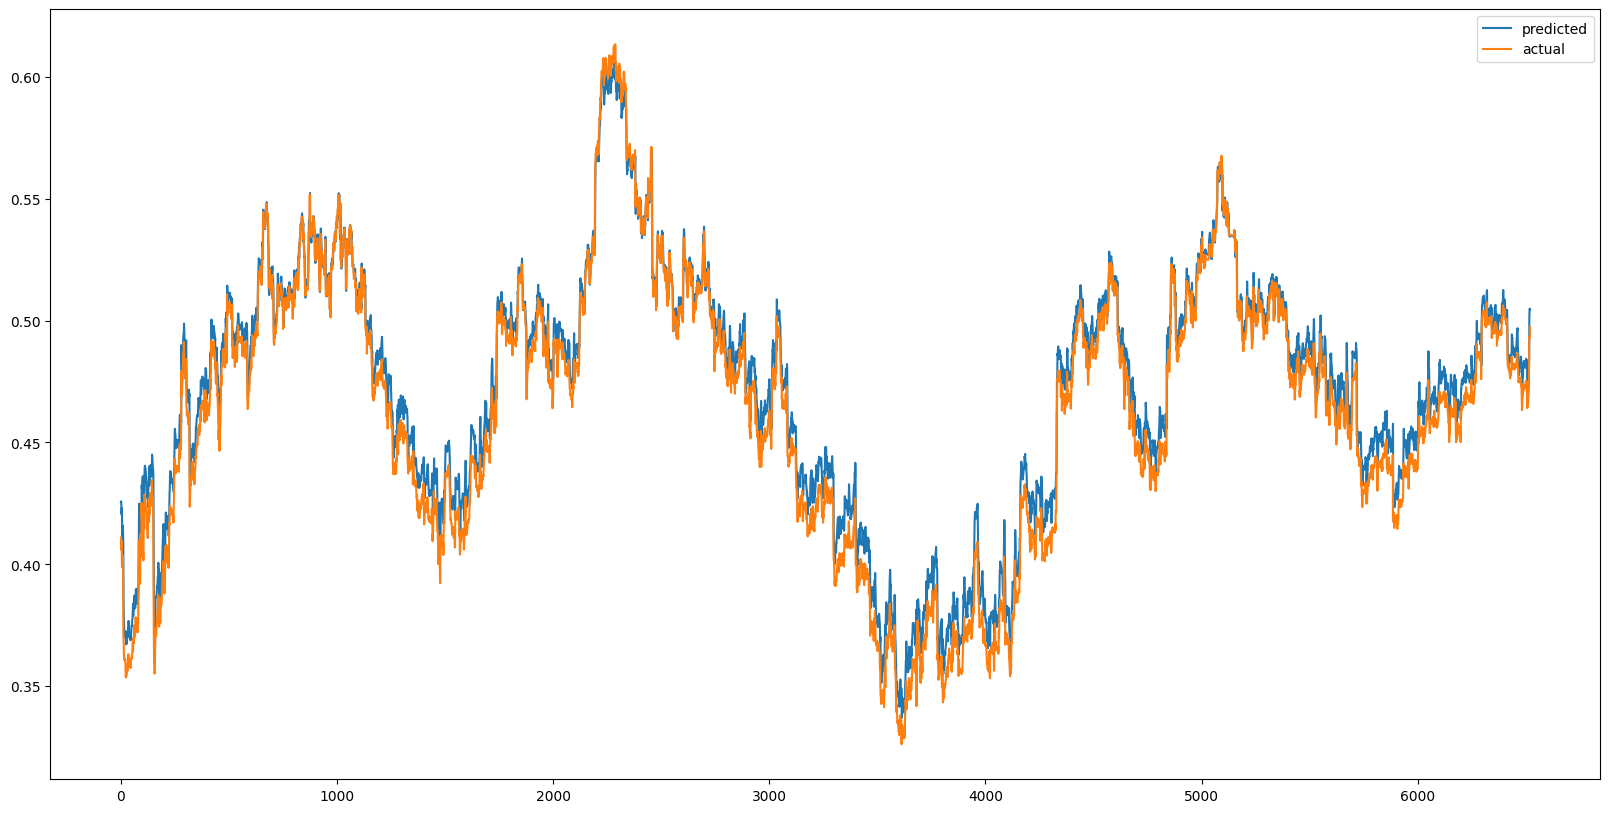

<Figure size 1000x1000 with 0 Axes>

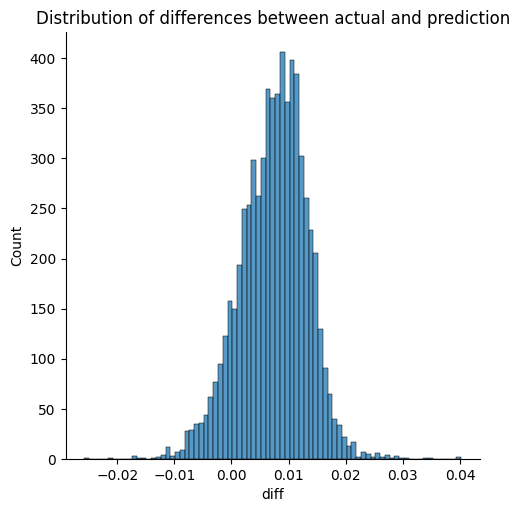

MAPE :  0.01866289067712894
MSE :  8.979783761094367e-05
MAE :  0.008137149115022642


count    6521.000000
mean        0.018663
std         0.012556
min         0.000013
25%         0.008369
50%         0.017261
75%         0.026798
max         0.116445
Name: diff, dtype: float64

In [37]:
model.load_weights(checkpoint_path)

pred = model.predict(testX)


predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['actual'] = testY
predictions = predictions.astype(float)
# to plot prediction testy vs testy
predictions.plot(figsize=(20,10))
plt.show()

predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.displot(predictions['diff'])
plt.title('Distribution of differences between actual and prediction')
plt.show()

# MAPE value
predictions['diff'] = predictions['diff'].abs()
predictions['diff'] = predictions['diff']/predictions['actual']
print("MAPE : ", predictions['diff'].mean())


print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
predictions['diff'].describe()

# Inverse Transformation and Prediction

## Inverse transformation on test data 

In [38]:
testY_inverse_scaled = scaler_y.inverse_transform(testY)
pred_test_inv=scaler_y.inverse_transform(pred)
pred_test_inv=np.round(pred_test_inv,5)
print(testY_inverse_scaled)
print(pred_test_inv)

[[1.06903]
 [1.06851]
 [1.06759]
 ...
 [1.09214]
 [1.09206]
 [1.09321]]
[[1.07309]
 [1.07318]
 [1.07271]
 ...
 [1.09531]
 [1.09534]
 [1.09521]]


## Predicting Training values


In [39]:
model.load_weights(checkpoint_path)
pred_train=model.predict(trainX)

y_train_inverse_scaled = scaler_y.inverse_transform(trainY)
pred_train_inverse_scaled = scaler_y.inverse_transform(pred_train)
pred_train_inverse_scaled = np.round(pred_train_inverse_scaled,5)

print(y_train_inverse_scaled)
print(pred_train_inverse_scaled)

  7/816 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step

/opt/homebrew/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 21 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


816/816 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step
[[1.14079]
 [1.14032]
 [1.14039]
 ...
 [1.06864]
 [1.06877]
 [1.06909]]
[[1.13705]
 [1.13728]
 [1.13692]
 ...
 [1.07171]
 [1.07238]
 [1.07269]]


## Plotting Training and Testing Predicted and Actual values

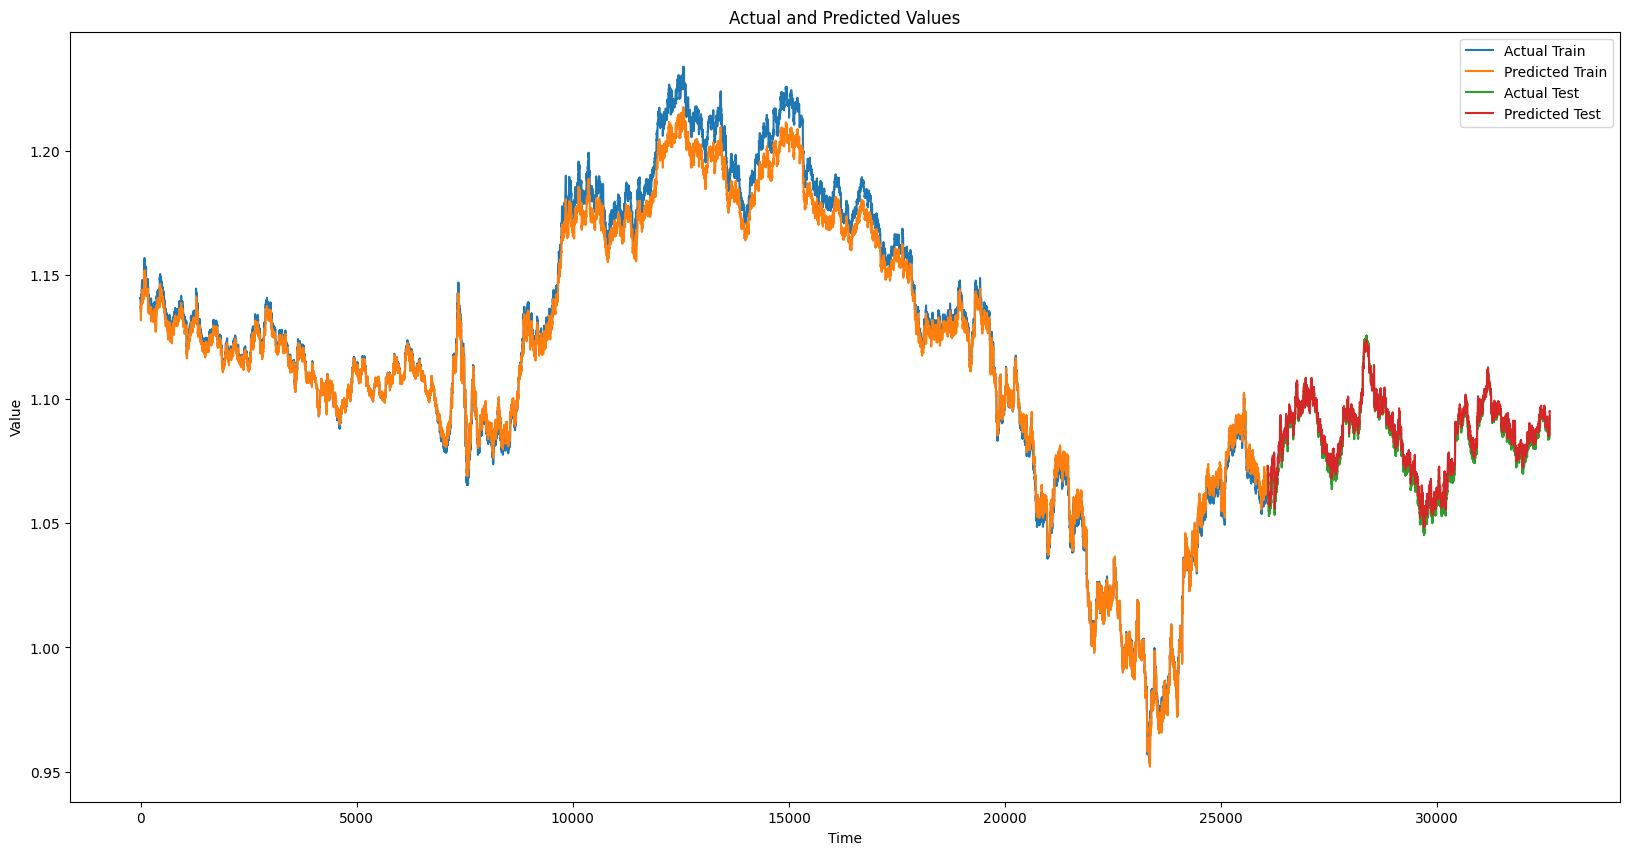

In [40]:
# Plotting
plt.figure(figsize=(20,10))

# Plotting actual train and predicted train
plt.plot(y_train_inverse_scaled, label='Actual Train')
plt.plot(pred_train_inverse_scaled, label='Predicted Train')

# Plotting actual test and predicted test
# Assuming testY_inverse_scaled is the actual test data and pred1 is the predicted test data
# Ensure testY_inverse_scaled and pred1 have the same length
train_length = len(y_train_inverse_scaled)
plt.plot(range(train_length, train_length+len(testY_inverse_scaled)), testY_inverse_scaled, label='Actual Test')
plt.plot(range(train_length, train_length+len(pred_test_inv)), pred_test_inv, label='Predicted Test')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual and Predicted Values')
plt.legend()
plt.show()